# Unsupervised learning 

In [587]:
import numpy as np          #importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [588]:
df = pd.read_csv('D:\\RIC\\3rd year\\machine learning\\coursework\\marketing_campaign_cluster.csv')
df
#importing the downloaded datset from local folder
#dataset link - https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### EDA

In [1004]:
dfED = df.copy(deep=True)
dfED
#creating a copy of the datset for exploratory data anaylis 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,TotalSpendings,AgeGroup,Children,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,66,33.0,1617,Senior Adult,0,platinum
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,69,5.0,27,Senior Adult,2,platinum
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,17.0,776,Middle Age Adult,0,bronze
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,39,3.0,53,Adult,1,silver
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,12.0,422,Middle Age Adult,1,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,56,19.0,1341,Middle Age Adult,1,platinum
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,77,3.0,444,Senior Adult,3,bronze
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,42,12.0,1241,Middle Age Adult,0,platinum
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,67,12.0,843,Senior Adult,1,bronze


In [590]:
dfED.shape  #checking how many rows and columns in the dataset

(2240, 29)

In [591]:
dfED.nunique()   #checking how many are repeating and how many are unique 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [592]:
dfED.isna().any() #checking for null values

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [593]:
dfED=dfED.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
dfED.head()     #dropping 2 columns 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


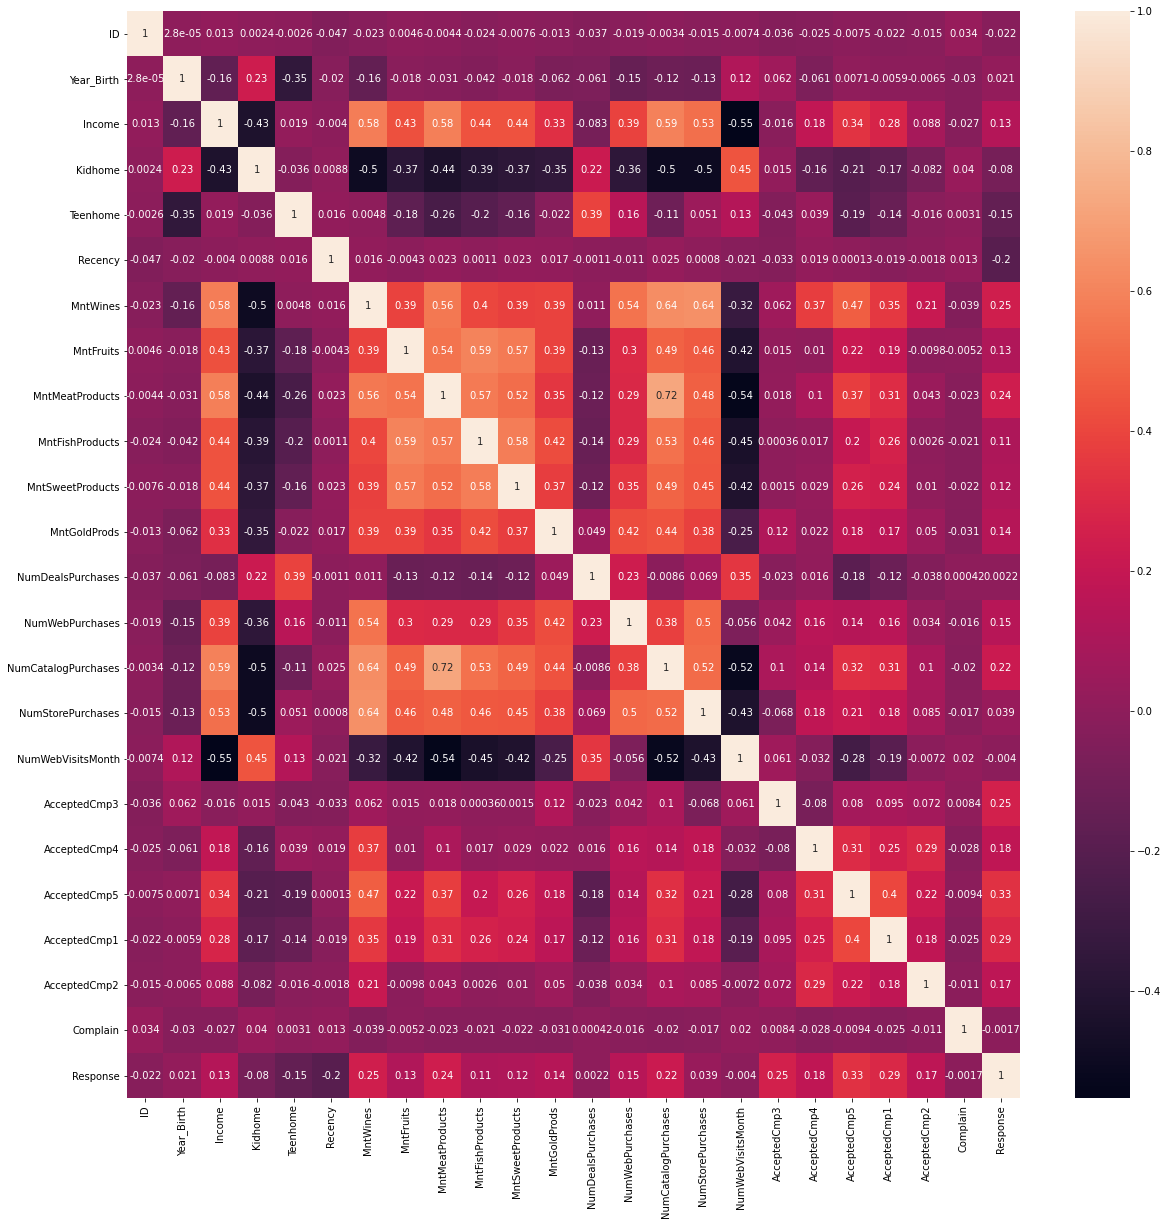

In [594]:
plt.figure(figsize=(20,20))
sns.heatmap(dfED.corr(), annot=True)
plt.show()   #correlation matrix for all the attributes in the dataset

In [595]:
corr = dfED.corr()
corr1= corr.abs().unstack()
corr1.sort_values(ascending = False)[24:50:2]    #correlation values in the ascending order

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

In [1005]:
dfED['Income'] = dfED['Income'].fillna(dfED['Income'].mean())
dfED.isna().any()   #filling up the missing income attribute values with the mea of the income attribute

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Age                    False
Month_Customer         False
TotalSpendings         False
AgeGroup                True
Children               False
clusters      

In [597]:
# eda by educaution
customer_count=dfED.groupby("Education").count()['ID']
customer_count

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

In [598]:
label=dfED.groupby('Education').count()['ID'].index
label   #education levels with the percentage of customers with specific educational level

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Education')

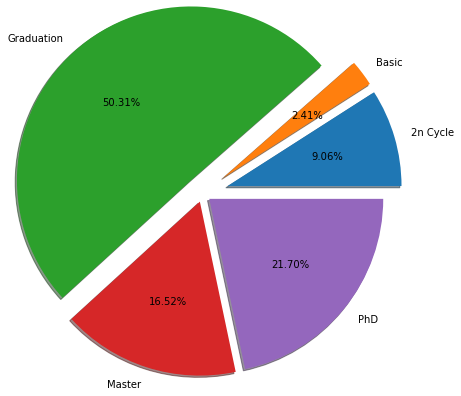

In [599]:
plt.axis("equal")
plt.pie(customer_count,labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.2,0.1,0.1])
plt.show()   #pie chart of the propotion of customers with different educational levels

In [600]:
spent_wine =dfED.groupby("Education").mean()['MntWines']
spent_wine    #mean of how much customers with different level of educational level spends on wine

Education
2n Cycle      198.182266
Basic           7.240741
Graduation    284.268855
Master        333.075676
PhD           404.495885
Name: MntWines, dtype: float64

In [601]:
spent_fruit =dfED.groupby("Education").mean()['MntFruits']
spent_fruit     #mean of how much customers with different level of educational level spends on fruit

Education
2n Cycle      28.955665
Basic         11.111111
Graduation    30.774623
Master        21.654054
PhD           20.049383
Name: MntFruits, dtype: float64

In [602]:
spent_meat=dfED.groupby("Education").mean()['MntMeatProducts']
spent_meat      #mean of how much customers with different level of educational level spends on meat

Education
2n Cycle      141.256158
Basic          11.444444
Graduation    179.488909
Master        163.378378
PhD           168.602881
Name: MntMeatProducts, dtype: float64

In [603]:
spent_fish=dfED.groupby("Education").mean()['MntFishProducts']
spent_fish     #mean of how much customers with different level of educational level spends on fish

Education
2n Cycle      47.482759
Basic         17.055556
Graduation    43.149956
Master        32.100000
PhD           26.728395
Name: MntFishProducts, dtype: float64

In [604]:
spent_sweet=dfED.groupby("Education").mean()['MntSweetProducts']
spent_sweet     #mean of how much customers with different level of educational level spends on sweet

Education
2n Cycle      34.251232
Basic         12.111111
Graduation    31.367347
Master        21.175676
PhD           20.222222
Name: MntSweetProducts, dtype: float64

In [605]:
spent_gold=dfED.groupby("Education").mean()['MntGoldProds']
spent_gold     #mean of how much customers with different level of educational level spends on gold

Education
2n Cycle      46.399015
Basic         22.833333
Graduation    50.849157
Master        40.397297
PhD           32.310700
Name: MntGoldProds, dtype: float64

In [606]:
exposs = np.arange(len(label))
exposs    #arranging the labels to plot each spending values

array([0, 1, 2, 3, 4])

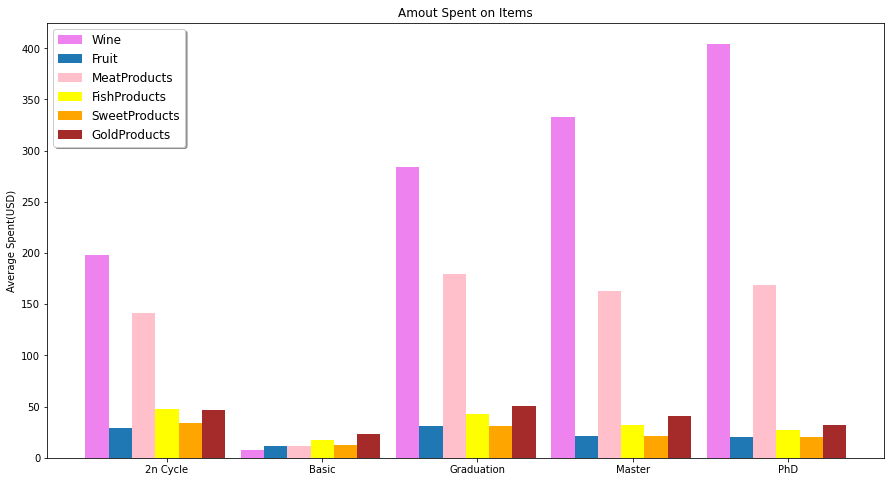

In [607]:
plt.figure(figsize=(15,8))
plt.bar(exposs-0.45,spent_wine,width=0.15, label="Wine",color='violet')
plt.bar(exposs-0.3,spent_fruit,width=0.15,label="Fruit")
plt.bar(exposs-0.15,spent_meat,width=0.15,label="MeatProducts",color='pink')
plt.bar(exposs,spent_fish,width=0.15,label="FishProducts",color='yellow')
plt.bar(exposs+0.15,spent_sweet,width=0.15,label="SweetProducts",color='orange')
plt.bar(exposs+0.3,spent_gold,width=0.15,label="GoldProducts",color='brown')

plt.xticks(exposs,label)
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(loc='upper left',shadow=True,fontsize='large')     #bar plot of how customers with different level of education spent money on different product types.


In [608]:
#EDA based on number of kids in the family

In [609]:
customer_count2 =dfED.groupby("Kidhome").count()['ID']
customer_count2  #number of customers with 0,1,2 kids at home

Kidhome
0    1293
1     899
2      48
Name: ID, dtype: int64

In [610]:
label2=dfED.groupby('Kidhome').count()['ID'].index
label2    #labeling the kids at home count with customer id 

Int64Index([0, 1, 2], dtype='int64', name='Kidhome')

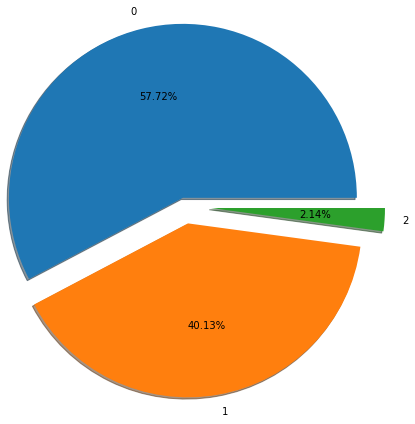

In [611]:
plt.axis("equal")
plt.pie(customer_count2,labels=label2, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.1,0.2,0.3,])
plt.show()     #plotting the propotions of customers with 0,1,2 kids at home

In [612]:
spent_wine2 =dfED.groupby("Kidhome").mean()['MntWines']
spent_wine2    #mean of how much customers with different number of kids at home spends on wine

Kidhome
0    451.173241
1    104.403782
2     74.791667
Name: MntWines, dtype: float64

In [613]:
spent_fruit2=dfED.groupby("Kidhome").mean()['MntFruits']
spent_fruit2      #mean of how much customers with different number of kids at home spends on fruit

Kidhome
0    39.392885
1     8.517241
2     6.770833
Name: MntFruits, dtype: float64

In [614]:
spent_meat2=dfED.groupby("Kidhome").mean()['MntMeatProducts']
spent_meat2     #mean of how much customers with different number of kids at home spends on meat

Kidhome
0    253.996133
1     48.862069
2     33.833333
Name: MntMeatProducts, dtype: float64

In [615]:
spent_fish2=dfED.groupby("Kidhome").mean()['MntFishProducts']
spent_fish2    #mean of how much customers with different number of kids at home spends on fish

Kidhome
0    56.162413
1    12.311457
2     7.729167
Name: MntFishProducts, dtype: float64

In [616]:
spent_sweet2=dfED.groupby("Kidhome").mean()['MntSweetProducts']
spent_sweet2      #mean of how much customers with different number of kids at home spends on sweet

Kidhome
0    40.498840
1     8.932147
2     4.708333
Name: MntSweetProducts, dtype: float64

In [617]:
spent_gold2=dfED.groupby("Kidhome").mean()['MntGoldProds']
spent_gold2      #mean of how much customers with different number of kids at home spends on gold

Kidhome
0    60.037123
1    22.408231
2    17.416667
Name: MntGoldProds, dtype: float64

In [618]:
exposs2 = np.arange(len(label2))
exposs2     #arranging the labels to plot

array([0, 1, 2])

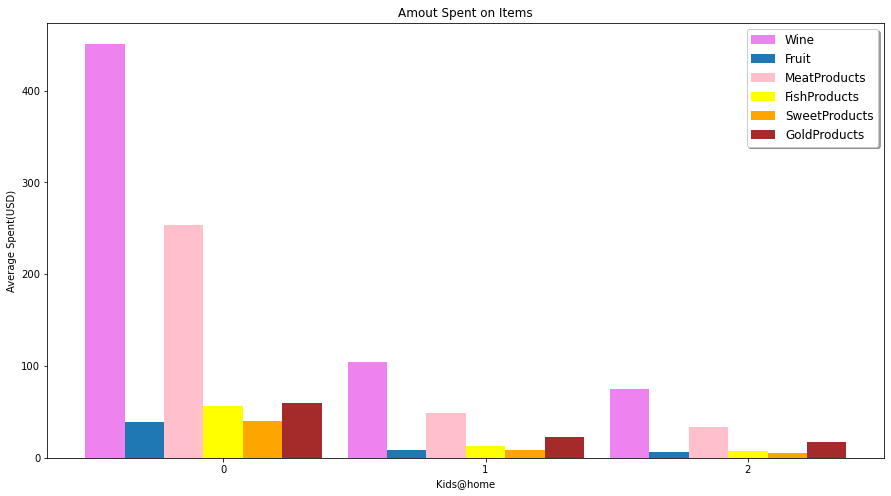

In [619]:
plt.figure(figsize=(15,8))
plt.bar(exposs2-0.45,spent_wine2,width=0.15, label="Wine",color='violet')
plt.bar(exposs2-0.3,spent_fruit2,width=0.15,label="Fruit")
plt.bar(exposs2-0.15,spent_meat2,width=0.15,label="MeatProducts",color='pink')
plt.bar(exposs2,spent_fish2,width=0.15,label="FishProducts",color='yellow')
plt.bar(exposs2+0.15,spent_sweet2,width=0.15,label="SweetProducts",color='orange')
plt.bar(exposs2+0.3,spent_gold2,width=0.15,label="GoldProducts",color='brown')

plt.xticks(exposs2,label2)
plt.xlabel('Kids@home')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(shadow=True,fontsize='large')   #bar plot of how customers spents when they have 0,1,2 kids at home

In [620]:
#data cleaning for Kmeans analysis

In [629]:
df.info()  #checking for any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [630]:
df.isna().sum()   #checking for number of null values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [631]:
df=df.dropna()   #dropping null values

In [632]:
df.isna().sum()  #comfirming no more null values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [633]:
df   #checking the dataset again

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,42
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,67


In [636]:
import datetime as dt
df['Age'] = 2023 - df['Year_Birth']   #creating a column as age with sustracting birth year from 2023

In [637]:
df.dtypes #checking the datatypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
dtype: object

In [1006]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month_Customer'] = 12.0 * (2023 - df.Dt_Customer.dt.year ) + (1 - df.Dt_Customer.dt.month) #converting dt_customers to datetime

In [639]:
df['TotalSpendings'] =  df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds     #calculating the total spendings of each customer

In [640]:
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'     #creating age groups 

In [641]:
df['Children'] = df['Kidhome'] + df['Teenhome']   #creating a attribute as children with adding kids at home and teens at home

In [642]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner','Married': 'Partner','Divorced': 'Single','Widow': 'Single', 'Alone': 'Single','Absurd': 'Single','YOLO': 'Single'})
#changing attribute values to partner and single 

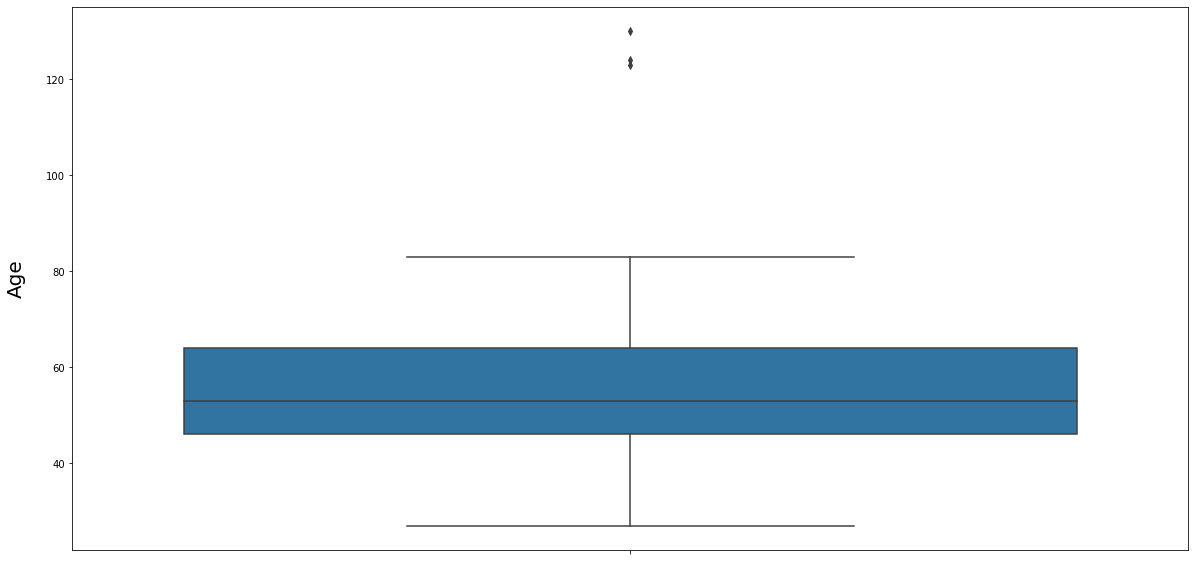

In [643]:
plt.figure(figsize=(20,10))
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);    #boxplot of how age varies

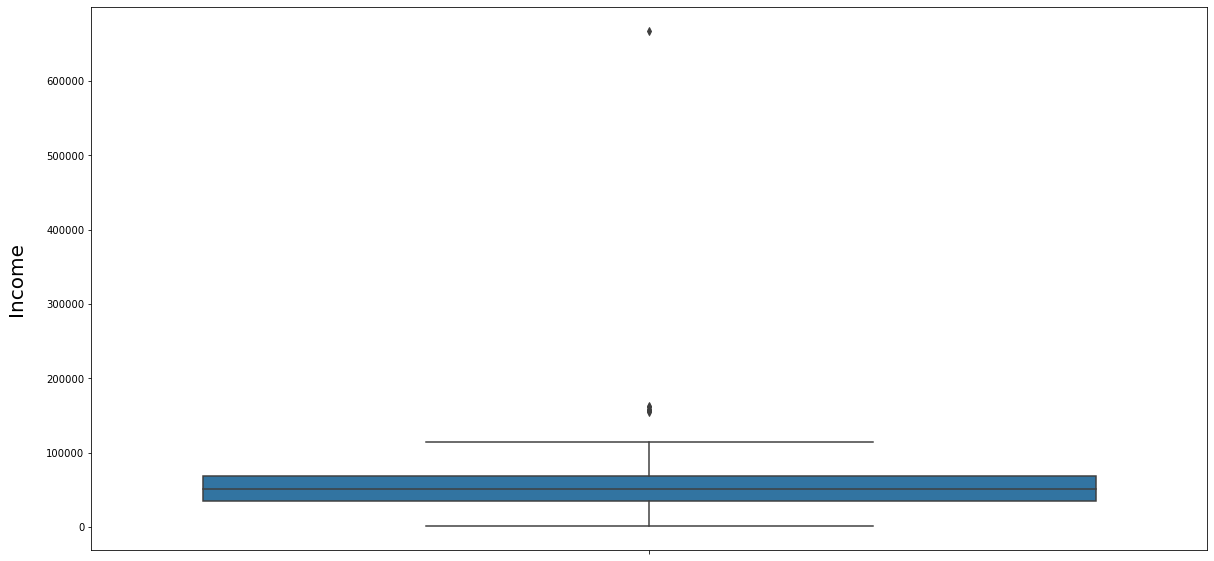

In [644]:
plt.figure(figsize=(20,10))
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);    #boxplot of how income vary

In [645]:
df = df[df.Age < 100]
df = df[df.Income < 120000]   #removing outliers

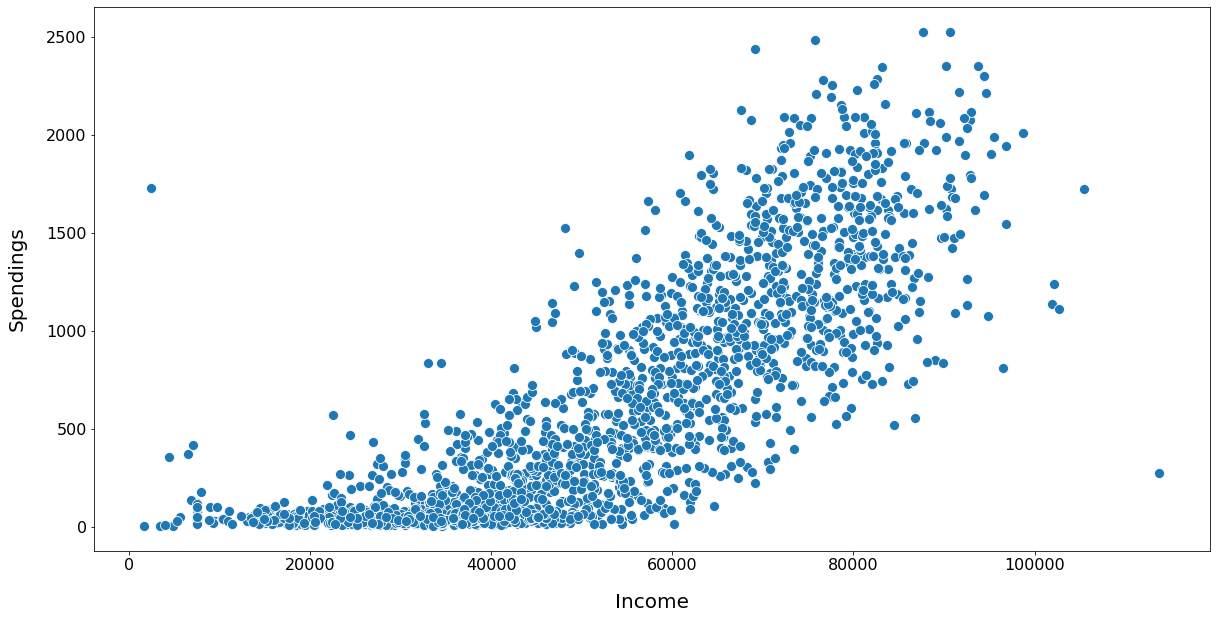

In [646]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=df.Income, y=df.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);    #plotting income vs total spendings for every customer

### K mean analysis

In [741]:
Z = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)
Z    #dropping unnecessary columns to create the model

,Income,Age,Month_Customer,TotalSpendings,Children
0,58138.0,66,33.0,1617,0
1,46344.0,69,5.0,27,2
2,71613.0,58,17.0,776,0
3,26646.0,39,3.0,53,1
4,58293.0,42,12.0,422,1
...,...,...,...,...,...
2235,61223.0,56,19.0,1341,1
2236,64014.0,77,3.0,444,3
2237,56981.0,42,12.0,1241,0
2238,69245.0,67,12.0,843,1


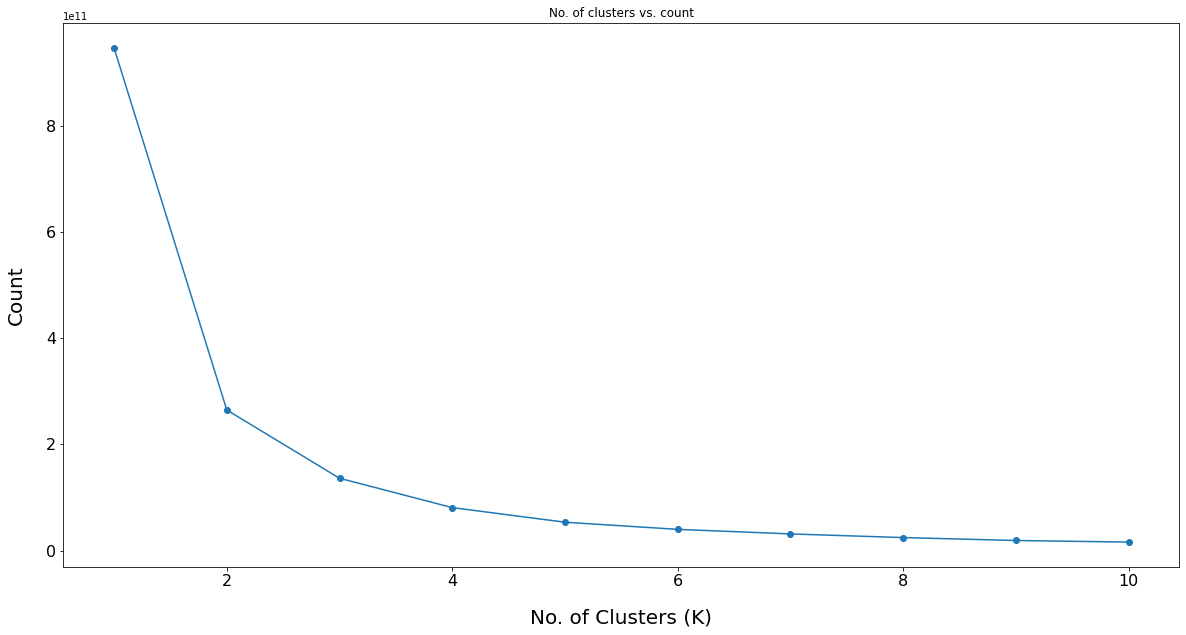

In [732]:
from sklearn.cluster import KMeans

options = range(1,11)
count = []

for n_clusters in options:
    model = KMeans(n_clusters, n_init = 'auto', random_state=42).fit(X)
    count.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. count")
plt.plot(options, count, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Count', fontsize=20, labelpad=20);    #importing kemeans and plottig the elbow graph to identify optimal value for k

In [742]:
model = KMeans(n_clusters=3, n_init='auto', random_state=42).fit(Z)

preds = model.predict(Z)

df_kmeans = Z.copy()
#creating the kmeans model for Z

In [743]:
df_kmeans['clusters'] = preds  #creating the df_cluster column

In [744]:
df_kmeans.clusters = df_kmeans.clusters.replace({1: 'bronze', 2: 'platinum',0: 'silver'})  #giving each cluster a name

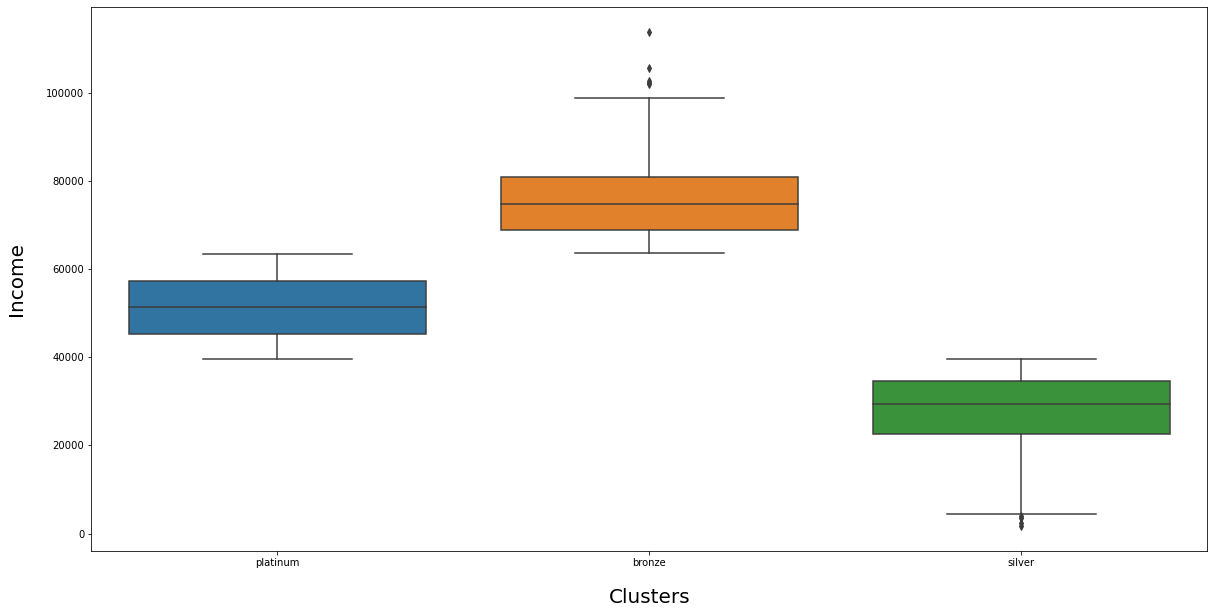

In [745]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);  #plotting how clusters differ with income

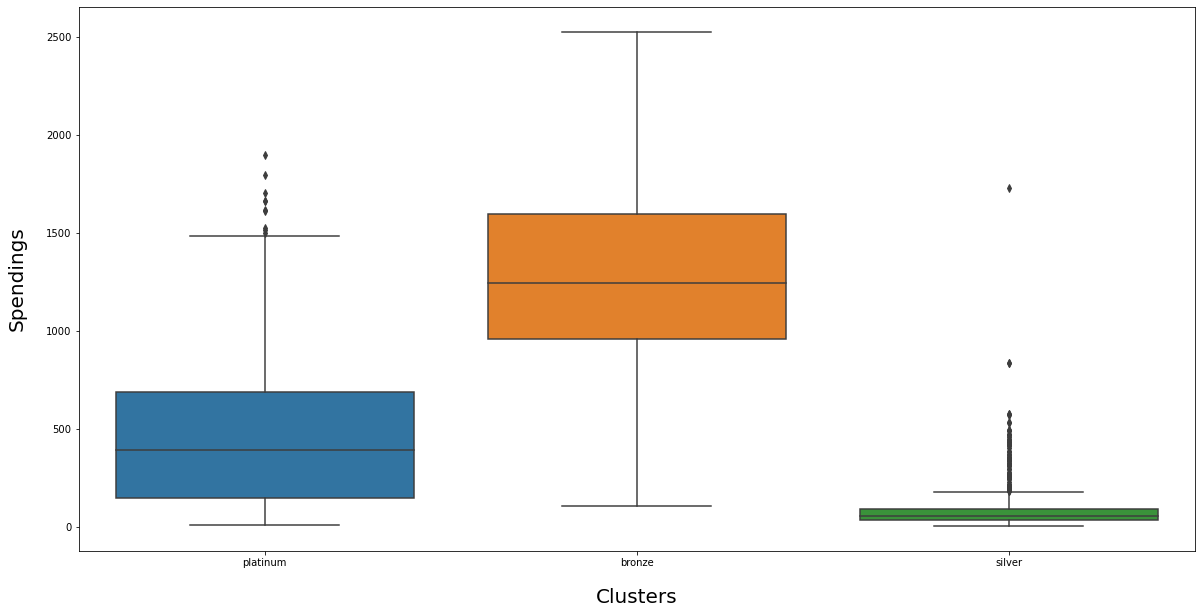

In [746]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);  #plotting how clusters differ with spendings

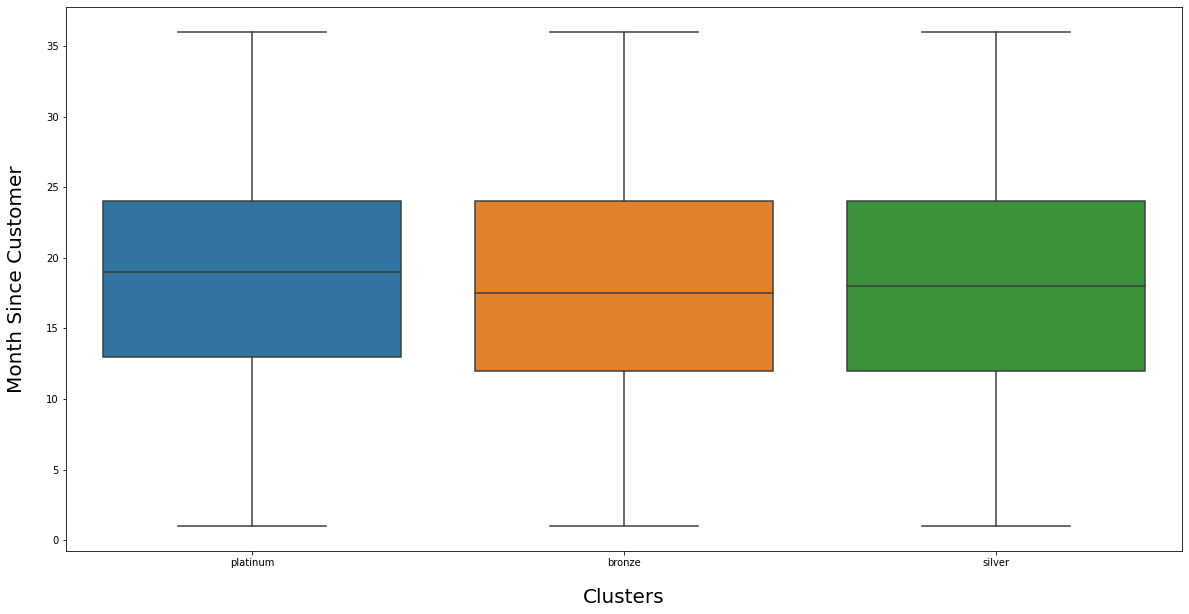

In [747]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20);   
#plotting how clusters differ with last time they went on buying some product

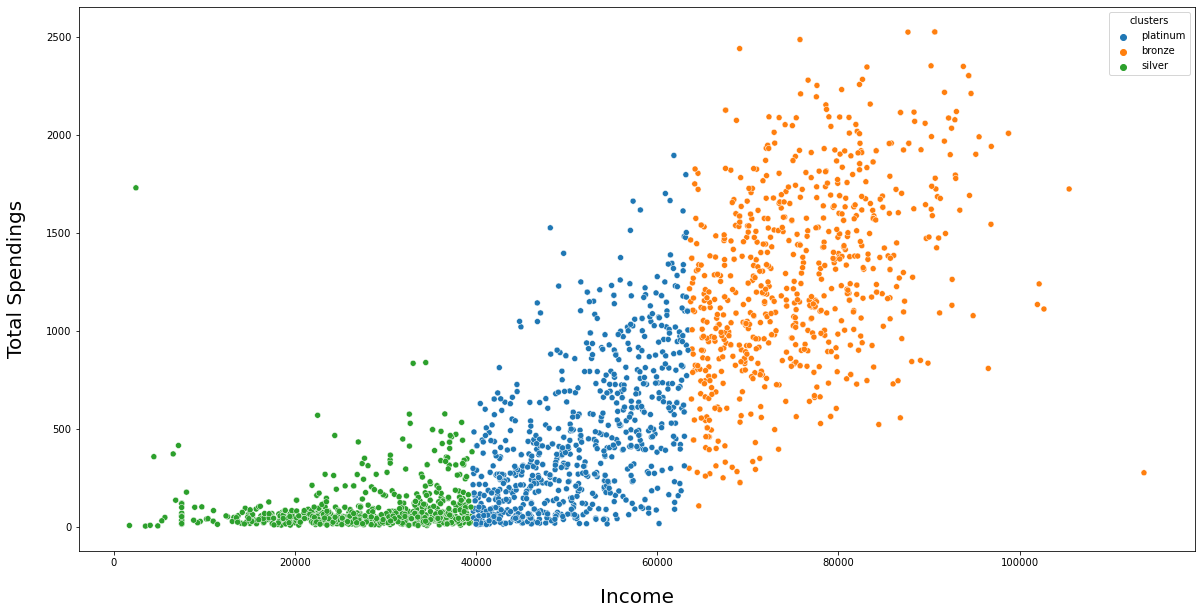

In [748]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_kmeans, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);
#plotting how clusters vary with the income and spendings

In [749]:
df_kmeans.clusters = df_kmeans.clusters.replace({1: 'bronze', 2: 'platinum',0: 'silver'})
df['clusters'] = df_kmeans.clusters
#creating the clusters column in main dataset

<Figure size 2160x1080 with 0 Axes>

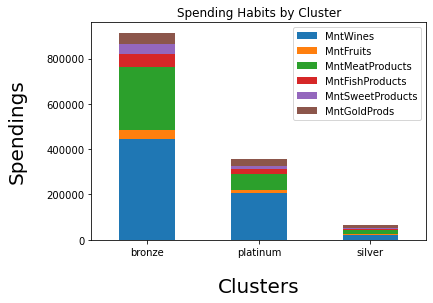

In [750]:
cluster_spendings = df.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');
#plotting how each cluster spends on different roduct types

In [751]:
# data cleaning for PCA

In [752]:
dfp = df.copy(deep=True)
dfp   #creating a copy of main dataset to do PCA

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,TotalSpendings,AgeGroup,Children,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,66,33.0,1617,Senior Adult,0,platinum
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,69,5.0,27,Senior Adult,2,platinum
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,17.0,776,Middle Age Adult,0,bronze
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,39,3.0,53,Adult,1,silver
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,12.0,422,Middle Age Adult,1,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,56,19.0,1341,Middle Age Adult,1,platinum
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,77,3.0,444,Senior Adult,3,bronze
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,42,12.0,1241,Middle Age Adult,0,platinum
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,67,12.0,843,Senior Adult,1,bronze


In [753]:
dfp.Marital_Status.unique()    #checking how many unique values are there in martial status attribute

array(['Single', 'Partner'], dtype=object)

In [754]:
customer_relship = {'Single' : 1,'Partner' : 2}  #creating a column as customer relationship

In [755]:
dfp['New_Marital_Status'] = dfp['Marital_Status'].map(customer_relship) #creating a new martial status attribute

In [756]:
for i in range(len(dfp)):
    dfp['Family_Size'] = dfp['New_Marital_Status'] + dfp['Teenhome'] + dfp['Kidhome'] 
#creating a column as family size wuth adding new martial status value, teenhome and kidhome values.

In [757]:
dfp['Cmp_accepted'] = dfp['AcceptedCmp1'] + dfp['AcceptedCmp2'] + dfp['AcceptedCmp3'] + dfp['AcceptedCmp4'] + \
dfp['AcceptedCmp5'] + dfp['Response']  

In [758]:
dfp['Dt_Customer'] = pd.to_datetime(dfp['Dt_Customer'], format="%d-%m-%Y")
#converting dt_customers to datetime

In [759]:
dfp['extracted_date'] = '07/12/2014'
dfp['extracted_date'] = pd.to_datetime(dfp['extracted_date'])
dfp['Reg_Days'] = dfp['extracted_date'] - dfp['Dt_Customer']
dfp['Reg_Days'] = dfp['Reg_Days'].dt.days
dfp.head(5)    #converting some attribute dtypes and creating reg_days 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Month_Customer,TotalSpendings,AgeGroup,Children,clusters,New_Marital_Status,Family_Size,Cmp_accepted,extracted_date,Reg_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,33.0,1617,Senior Adult,0,platinum,1,1,1,2014-07-12,824
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5.0,27,Senior Adult,2,platinum,1,3,0,2014-07-12,-22
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,17.0,776,Middle Age Adult,0,bronze,2,2,0,2014-07-12,325
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,3.0,53,Adult,1,silver,2,3,0,2014-07-12,-82
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,12.0,422,Middle Age Adult,1,platinum,2,3,0,2014-07-12,174


In [760]:
dfp['Total_Products'] = dfp['MntFishProducts'] + dfp['MntFruits'] + dfp['MntMeatProducts'] + \
    dfp['MntWines'] + dfp['MntSweetProducts'] + dfp['MntGoldProds'] #creating total products column

In [761]:
dfp.loc[(dfp['Income'].isnull() == True), 'Income'] = dfp['Income'].mean()  #replacing missing income values with average income 

In [762]:
dfp.drop_duplicates(inplace=True)  #removing duplicated values

In [763]:
dfp['Age'] = 2023 - df['Year_Birth']  #creating age attribute

In [764]:
dfp1 = dfp.loc[: ,['Age','Income', 'Recency', 'Family_Size','Cmp_accepted','NumDealsPurchases','Reg_Days','Total_Products','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
#only taking the neccessary columns to the model

In [765]:
dfp1.isnull().sum() #checking for null values

Age                    0
Income                 0
Recency                0
Family_Size            0
Cmp_accepted           0
NumDealsPurchases      0
Reg_Days               0
Total_Products         0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [766]:
dfp1

,Age,Income,Recency,Family_Size,Cmp_accepted,NumDealsPurchases,Reg_Days,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,66,58138.0,58,1,1,3,824,1617,8,10,4,7
1,69,46344.0,38,3,0,2,-22,27,1,1,2,5
2,58,71613.0,26,2,0,1,325,776,8,2,10,4
3,39,26646.0,26,3,0,2,-82,53,2,0,4,6
4,42,58293.0,94,3,0,5,174,422,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,61223.0,46,3,0,2,394,1341,9,3,4,5
2236,77,64014.0,56,5,1,7,-86,444,8,2,5,7
2237,42,56981.0,91,1,1,1,168,1241,2,3,13,6
2238,67,69245.0,8,3,0,2,169,843,6,5,10,3


In [767]:
dfp1.describe() #checking mean, std,  etc.

,Age,Income,Recency,Family_Size,Cmp_accepted,NumDealsPurchases,Reg_Days,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,54.095692,51622.094785,49.009070,2.593651,0.450340,2.318367,365.062585,606.821769,4.100680,2.645351,5.823583,5.336961
std,11.705801,20713.063826,28.932111,0.906197,0.894075,1.886107,232.528808,601.675284,2.737424,2.798647,3.241796,2.413535
min,27.000000,1730.000000,0.000000,1.000000,0.000000,0.000000,-147.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,35196.000000,24.000000,2.000000,0.000000,1.000000,193.000000,69.000000,2.000000,0.000000,3.000000,3.000000
50%,53.000000,51287.000000,49.000000,3.000000,0.000000,2.000000,366.000000,397.000000,4.000000,2.000000,5.000000,6.000000
75%,64.000000,68281.000000,74.000000,3.000000,1.000000,3.000000,539.000000,1047.000000,6.000000,4.000000,8.000000,7.000000
max,83.000000,113734.000000,99.000000,5.000000,5.000000,15.000000,916.000000,2525.000000,27.000000,28.000000,13.000000,20.000000


### principles component analysis 

In [768]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA #importing libraries for PCA

In [769]:
scaler = StandardScaler()
dfp1_scaled = scaler.fit_transform(dfp1)
dfp1_scaled  #scaling the dataset

array([[ 1.01718872,  0.31465086,  0.31083003, ...,  2.62852614,
        -0.5626499 ,  0.68920297],
       [ 1.27353005, -0.25487741, -0.38060021, ..., -0.58804297,
        -1.17973173, -0.13964489],
       [ 0.33361186,  0.96535404, -0.79545835, ..., -0.2306464 ,
         1.2885956 , -0.55406882],
       ...,
       [-1.03354187,  0.25877972,  1.45168993, ...,  0.12675017,
         2.21421835,  0.27477904],
       [ 1.10263583,  0.85100412, -1.41774556, ...,  0.8415433 ,
         1.2885956 , -0.96849275],
       [ 1.27353005,  0.06021263, -0.31145718, ..., -0.58804297,
        -0.5626499 ,  0.68920297]])

In [770]:
pca = PCA()
pca.fit(dfp1_scaled)  #defining the model as pca

PCA()

In [771]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()  #calculating the explained variance ratios

array([0.35899052, 0.50491966, 0.60590414, 0.69198895, 0.76174617,
       0.82853099, 0.87924945, 0.91970736, 0.95102016, 0.97404964,
       0.99037967, 1.        ])

Text(0, 0.5, 'cumculative explained variance')

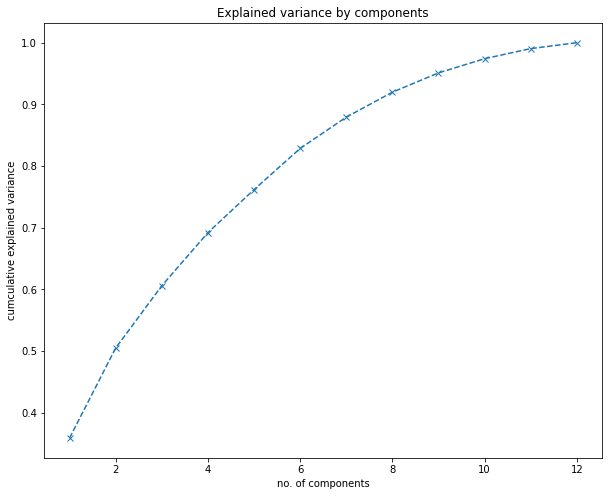

In [772]:
plt.figure(figsize=(10,8))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('Explained variance by components')
plt.xlabel('no. of components')
plt.ylabel('cumculative explained variance')  
#plotting the PCA graph to understand how many components are needed.

In [773]:
pca_7 = PCA(n_components=7) #using 7 components 

In [774]:
pca_7.fit(dfp1_scaled)

PCA(n_components=7)

In [775]:
pca_7.explained_variance_ratio_ 

array([0.35899052, 0.14592914, 0.10098447, 0.08608481, 0.06975722,
       0.06678483, 0.05071846])

In [776]:
pca_7.explained_variance_ratio_.sum() #checking how much of the variation is actually using in PCA

0.8792494542006328

# Regression Analysis

In [807]:
from sklearn.model_selection import train_test_split
import plotly.express as px   #importing libararies

In [1007]:
dfreg = pd.read_csv('D:\\RIC\\3rd year\\machine learning\\coursework\\CO2_emissions_canada.csv')
dfreg  #importing the datset
#dataset - https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [811]:
dfreg.isnull().sum() #checking for null values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [812]:
dfreg.shape #checking the shape

(7385, 12)

In [813]:
dfreg.nunique() #checking for number of unique values 

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [814]:
dfreg.duplicated().sum() #checking for any duplicate values

1103

In [815]:
dfreg.drop_duplicates(inplace=True) #dropping duplicate values

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

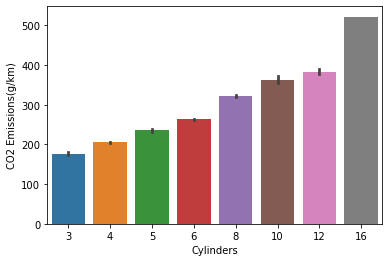

In [819]:
sns.barplot(x=dfreg["Cylinders"], y=dfreg["CO2 Emissions(g/km)"])  #plotting number of cylinders vs co2 emission

In [820]:
#Fuel types:
#X = regular gasoline
#Z = premium gasoline
#D = diesel
#E = ethanol (E85)
#N = natural gas


<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

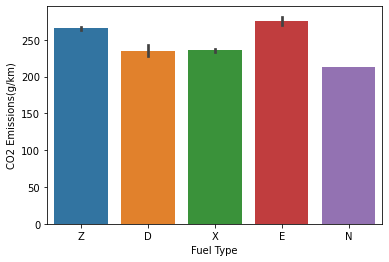

In [821]:
sns.barplot(x=dfreg["Fuel Type"], y=dfreg["CO2 Emissions(g/km)"]) #plotting fuel types vs co2 emission

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

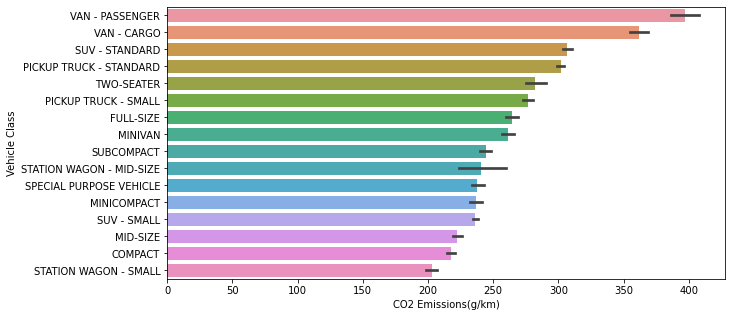

In [823]:
plt.figure(figsize=(10,5))
order =dfreg.groupby(['Vehicle Class']).mean().sort_values('CO2 Emissions(g/km)',ascending=False).index
sns.barplot(x= dfreg["CO2 Emissions(g/km)"], y= dfreg["Vehicle Class"],order=order) 
#plotting how many in each vehicle class vs its c02 emissions

In [824]:
dfreg

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [825]:
topBRANDS = dfreg[["Make","CO2 Emissions(g/km)"]].groupby(["Make"],as_index=False).mean().sort_values(by="CO2 Emissions(g/km)",ascending=False)
top5 = topBRANDS.head()
top5
#identifying top 5 brands with the highest co2 emission values per km

,Make,CO2 Emissions(g/km)
6,BUGATTI,522.000000
22,LAMBORGHINI,402.270270
37,SRT,389.000000
34,ROLLS-ROYCE,388.750000
4,BENTLEY,367.914286


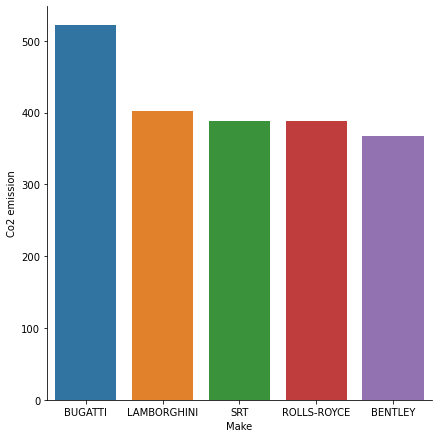

In [826]:
bar =sns.catplot(x="Make",y="CO2 Emissions(g/km)",data=top5,kind="bar",height=6)
bar.set_ylabels("Co2 emission")
plt.show() 
#plotting top 5 brands with the highest co2 emission values per km

In [827]:
dfreg.columns #checking column names 

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [828]:
dfreg2 = dfr.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)'], axis=1)
dfreg2
#dropping unwanted columns for the model

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244
...,...,...,...,...,...
7380,2.0,4,10.7,9.4,219
7381,2.0,4,11.2,9.9,232
7382,2.0,4,11.7,10.3,240
7383,2.0,4,11.2,9.9,232


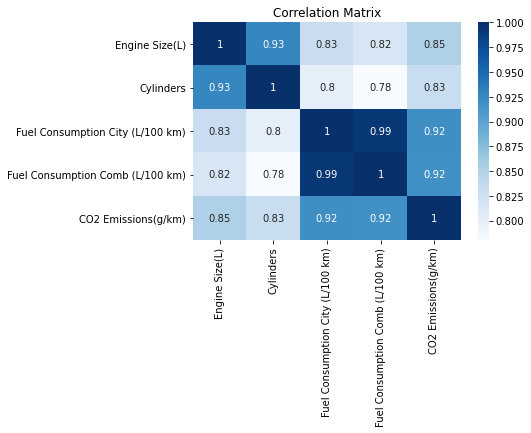

In [831]:
CRMT2 = dfreg2.corr()
sns.heatmap(CRMT2,annot = True , cmap = 'Blues')

plt.title("Correlation Matrix")
plt.show()
#creating correlation matrix for the columns left

In [832]:
dfreg['Vehicle Class'].value_counts()
#calculating number of vehicles in each vehicle class

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [833]:
dfreg['Fuel Type'].value_counts()
#calculating number of vehicles with each fuel type

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64

<Figure size 1296x432 with 0 Axes>

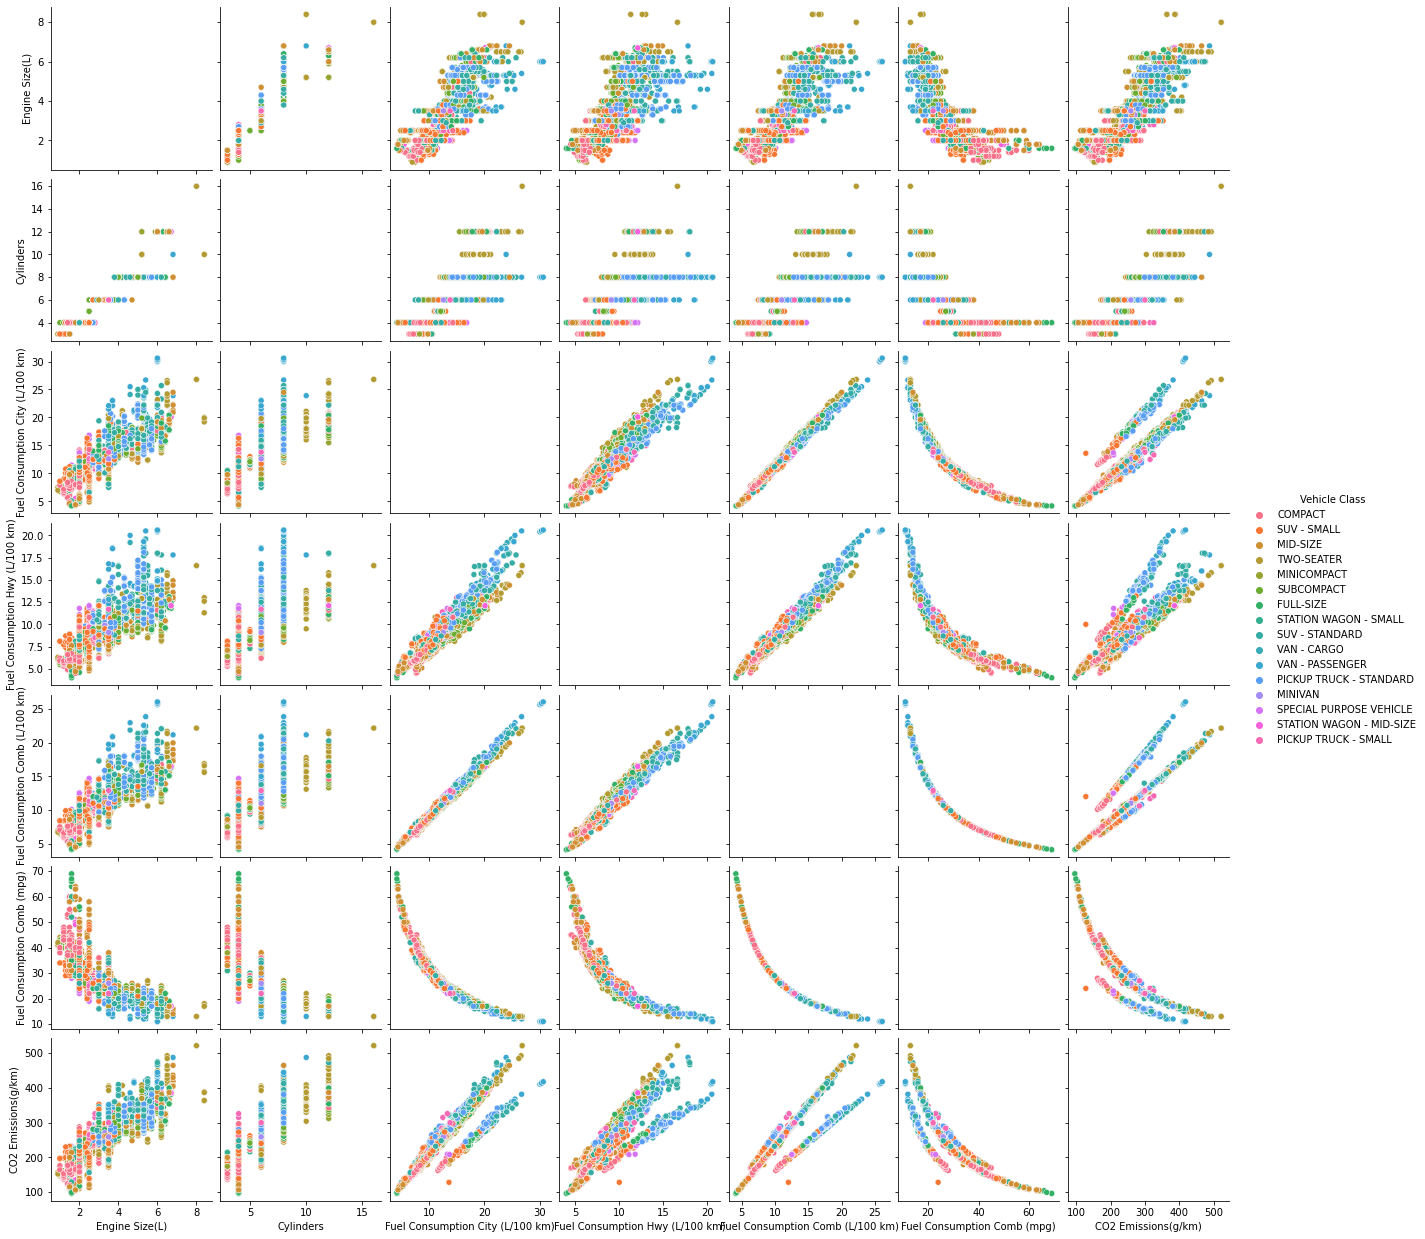

In [834]:
plt.figure(figsize=(18,6))
sns.pairplot(dfreg, hue='Vehicle Class', diag_kind={'kde':{'bw':1}})
#plotting all columns left with each other to identify their relationships

### Linear Regression analysis

In [797]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
#importing libraries

In [835]:
scalerreg = StandardScaler()
#scaling the datset 

In [836]:
y = dfr2['CO2 Emissions(g/km)']
x = dfr2.drop('CO2 Emissions(g/km)', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model5 = LinearRegression()
model5.fit(x_train, y_train)
#creating x and y for the model and modeeling using linear regression

LinearRegression()

In [837]:
xr_train = scaler.fit_transform(x_train)
xr_test = scaler.fit_transform(x_test)
#creating scaled train and test data

In [839]:
y_predictreg = model5.predict(x_test)
#creating regression prediction variable

In [840]:
r2_score(y_test,y_predictreg)
#checking r squared value

0.8785532133457314

In [841]:
MSE = mean_squared_error(y_test,y_predictreg)
MSE
#checking mean squared error value

441.3225458354427

In [842]:
RMSE = np.sqrt(MSE)
RMSE
#checking root mean squared error value

21.0076782590424

In [843]:
MAE = mean_absolute_error(y_test,y_predictreg)
MAE
#checing mean absolute error value

13.958988607604924

### KNN Regression analysis

In [845]:
from sklearn.neighbors import KNeighborsRegressor
#importing library

In [846]:
knn = KNeighborsRegressor(n_neighbors=3)
#defining the model

In [847]:
modelknn = knn.fit(xr_train,y_train)
#creating the model

In [848]:
y_predictknn = modelknn.predict(xr_test)
#creating knn prediction variable

In [849]:
r2_score(y_test,y_predictknn)
#checking r squared value

0.9726887079377887

In [850]:
mean_squared_error(y_test,y_predictknn)
#checking mean squared error value

99.2458448263668

In [851]:
RMSE2 = np.sqrt(mean_squared_error(y_test,y_predictknn))
RMSE2
#checking root mean squared error value

9.962220878216202

In [882]:
MAE2 = mean_absolute_error(y_test,y_predictknn)
MAE2
#checing mean absolute error value

4.740717165287503

### Support Vector Regression Model(SVR)

In [853]:
from sklearn.svm import LinearSVR
#importing library

In [854]:
svr = LinearSVR()
#defining the model

In [855]:
modelsvr = svr.fit(xr_train,y_train)
#creating the model

In [856]:
y_predictsvr = modelsvr.predict(xr_test)
#creating SVR prediction variable

In [857]:
r2_score(y_test,y_predictsvr)
#checking r squared value

0.8063082554845071

In [859]:
MSE3 = mean_squared_error(y_test,y_predictsvr)
MSE3
#checking mean squared error value

703.8517539391896

In [860]:
RMSE3 = np.sqrt(MSE3)
RMSE3
#checking root mean squared error value

26.53020455893979

In [861]:
MAE3 = mean_absolute_error(y_test,y_predictsvr)
MAE3
#checing mean absolute error value

9.920867593307888

### Decision Tree Regressor 

In [862]:
from sklearn.tree import DecisionTreeRegressor
#importing library

In [865]:
dictree = DecisionTreeRegressor()
#defining the model

In [866]:
modeldictree = dictree.fit(x_train,y_train)
#creating the model

In [867]:
y_predictdtree = modeldictree.predict(x_test)
#creating decisiton tree prediction variable

In [869]:
r2_score(y_test,y_predictdtree)
#checking r squared value

0.9565981852675071

In [870]:
MSE4 = mean_squared_error(y_test,y_predictdtree)
MSE4
#checking mean squared error value

157.71680667146555

In [872]:
RMSE4 = np.sqrt(mean_squared_error(y_test,y_predictdtree))
RMSE4
#checking root mean squared error value

12.558535212016787

In [873]:
MAE4 = mean_absolute_error(y_test,y_predictdtree)
MAE4
#checing mean absolute error value

3.972464175615035

### Random Forest Regressor 

In [874]:
from sklearn.ensemble import RandomForestRegressor
#importing library

In [875]:
RF = RandomForestRegressor(n_estimators=100)
#defining the model

In [876]:
modelrf = RF.fit(x_train,y_train)
#creating the model

In [877]:
y_predictrf = modelrf.predict(x_test)
#creating random forest prediction variable

In [878]:
r2_score(y_test,y_predictrf)
#checking r squared value

0.9738598889539042

In [879]:
MSE5 = mean_squared_error(y_test,y_predictrf)
MSE5
#checking mean squared error value

94.98991840867053

In [880]:
RMSE5 = np.sqrt(mean_squared_error(y_test,y_predictrf))
RMSE5
#checking root mean squared error value

9.7462771563644

In [881]:
MAE5 = mean_absolute_error(y_test,y_predictrf)
MAE5
#checking mean absolute error value

3.746176041827326

# Classification 

In [926]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
#importing libraries

In [927]:
test_data = pd.read_csv('D:\\RIC\\3rd year\\machine learning\\coursework\\airplane_passenger_satisfraction_test.csv')
dfclass = pd.read_csv('D:\\RIC\\3rd year\\machine learning\\coursework\\airplane_passenger_satisfraction_train.csv')
#importing the datets
#dataset - https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [928]:
dfclass.isnull().sum() #checking for null values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [929]:
dfclass.head() 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [930]:
dfclass.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
#removing unwanted columns 

In [931]:
print(f"Number of rows in training data: {dfclass.shape[0]}")
print(f"Number of rows in test data: {test_data.shape[0]}")
#checking number of rows

Number of rows in training data: 103904
Number of rows in test data: 25976


In [932]:
dfclass.info() #checking nul values and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [933]:
dfclass.describe() #checking mean,std etc.

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Exploratory data analysis

In [934]:
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [935]:
dfclass[cat_cols_temp] = dfclass[cat_cols_temp].astype(object)

In [936]:
cat_columns = dfclass.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = dfclass.select_dtypes(np.number).columns.to_list()
print(num_columns)
#identifying object columns and numerical columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [937]:
sample_data = dfclass.sample(3000)
sample_data
#taking a sample of 1000 rows

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
98048,Female,Loyal Customer,52,Business travel,Business,3483,5,5,5,5,...,4,4,4,4,5,4,4,18,7.0,satisfied
20956,Female,Loyal Customer,53,Business travel,Business,581,2,2,2,2,...,4,4,4,4,4,4,3,0,0.0,satisfied
95243,Female,Loyal Customer,62,Personal Travel,Eco,2496,2,5,2,2,...,3,4,3,4,2,5,2,3,18.0,neutral or dissatisfied
99963,Male,Loyal Customer,49,Business travel,Business,3489,2,2,2,2,...,3,3,4,3,5,3,3,0,0.0,satisfied
2033,Female,disloyal Customer,22,Business travel,Eco,1723,5,5,5,5,...,2,4,4,4,3,4,2,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78957,Female,Loyal Customer,25,Business travel,Eco Plus,563,5,2,2,2,...,5,1,3,4,4,2,5,6,6.0,satisfied
82145,Male,Loyal Customer,59,Personal Travel,Eco,1916,2,4,2,1,...,2,4,3,3,5,4,2,0,0.0,neutral or dissatisfied
95136,Male,Loyal Customer,9,Personal Travel,Eco,1744,2,2,2,3,...,2,2,4,3,2,4,2,15,4.0,neutral or dissatisfied
66233,Female,Loyal Customer,59,Business travel,Business,3314,2,2,1,2,...,5,5,5,5,4,5,3,0,8.0,satisfied


In [938]:
dfclass.dtypes
#checking datatypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [939]:
sample_data['satisfaction'] = sample_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
#mapping values in sample data to 1 and 0

In [940]:
sample_data.dtypes #checking datatypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [941]:
sample_data[["Inflight entertainment","satisfaction"]].groupby(["Inflight entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False) 
#grouping the satiaction level in sample data 

,Inflight entertainment,satisfaction
4,5,0.654521
3,4,0.609784
2,3,0.291592
1,2,0.226374
0,1,0.133880


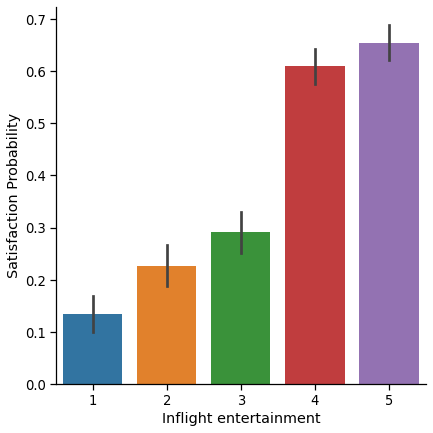

In [942]:
plot77 =sns.catplot(x="Inflight entertainment",y="satisfaction",data=sample_data,kind="bar",height=6)
plot77.set_ylabels("Satisfaction Probability")
plt.show()
#plotting satisfaction propotions

In [943]:
sample_data2 = sample_data.loc[~((sample_data['Online boarding'] == 0))]
#taking online boarding column from sample data only

In [944]:
sample_data2[["Online boarding","satisfaction"]].groupby(["Online boarding"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)
#identifying satisfaction propotions of online boarding in the sample data 

,Online boarding,satisfaction
4,5,0.872054
3,4,0.620545
2,3,0.159744
1,2,0.123932
0,1,0.109215


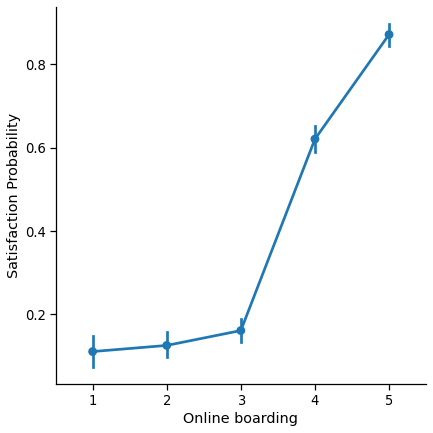

In [945]:
plot78 =sns.catplot(x="Online boarding",y="satisfaction",data=sample_data2,kind="point",legend=False,height=6)
plot78.set_ylabels("Satisfaction Probability")
plt.show()
#plotting propotional satisfaction for online boarding

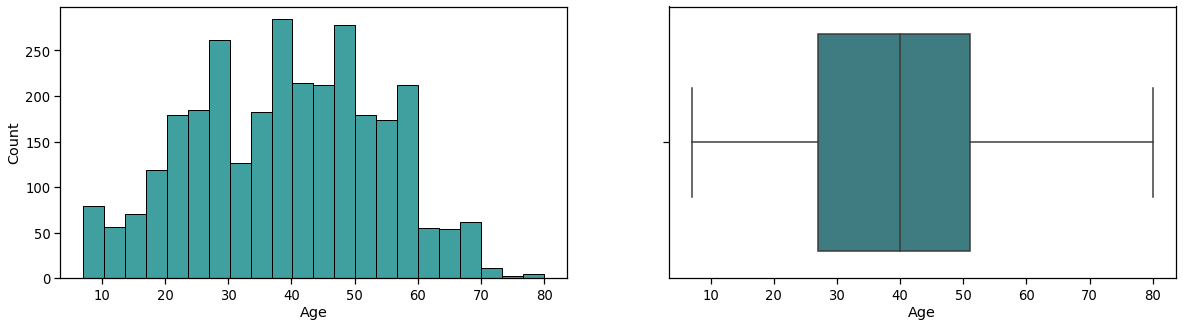

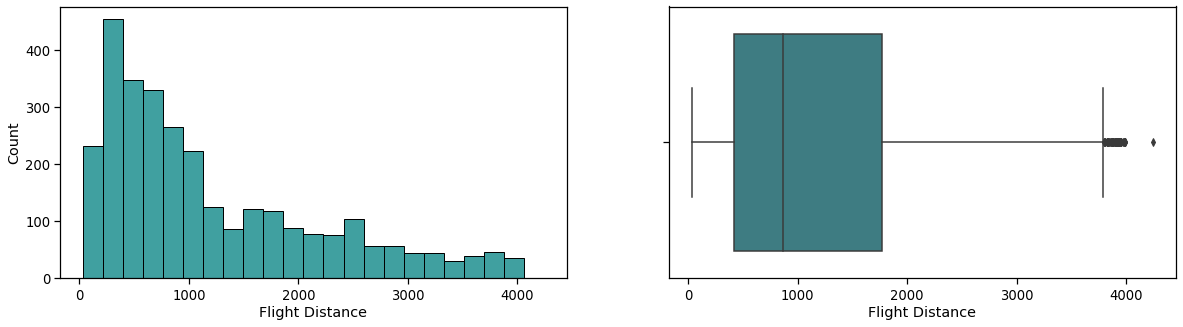

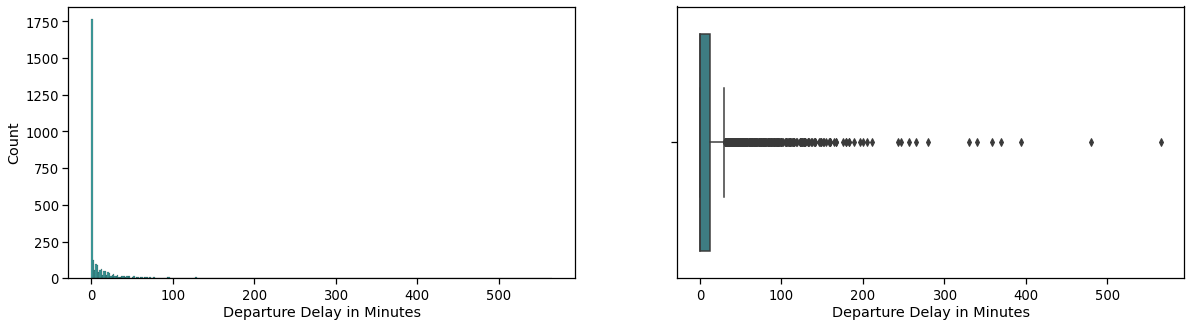

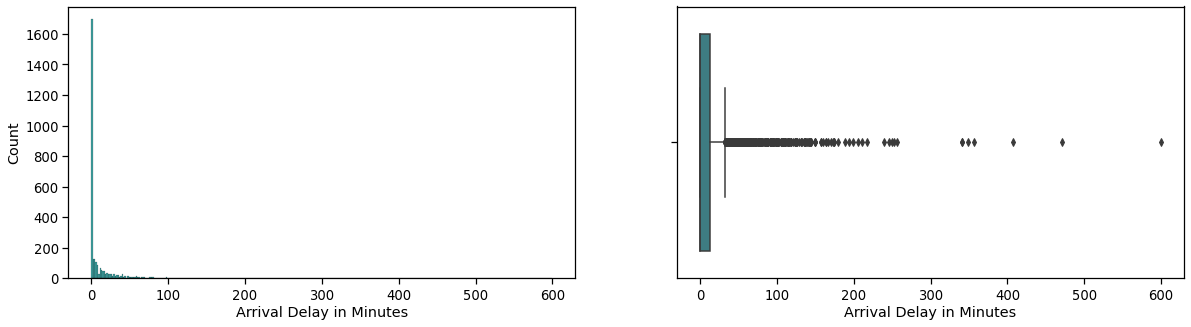

In [946]:
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')
    #plotting some grpahs to understand each attribute

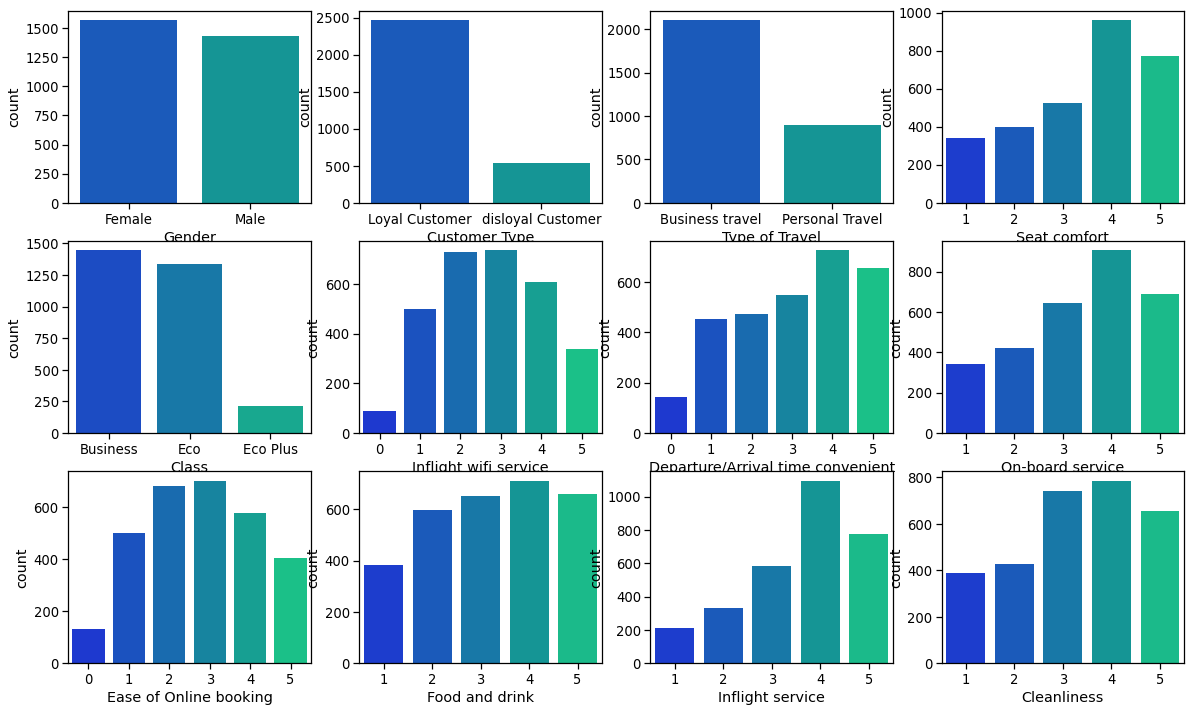

In [947]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = sample_data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = sample_data, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = sample_data, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = sample_data, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'winter', ax = axes[2, 3]);
#plotting graphs to understand each attribute

## Data Cleaning

In [948]:
dfclass.isnull().sum() #checking for null values

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [949]:
median_val = dfclass['Arrival Delay in Minutes'].median()
dfclass['Arrival Delay in Minutes'] = dfclass['Arrival Delay in Minutes'].fillna(median_val)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(median_val)
#filling arrival delay null values with the median arrival delay value

In [951]:
dfclass.isnull().sum() #confirming no more null valuues

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [952]:
dfclass[cat_columns].nunique() #checking number of unique values

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

In [953]:
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = dfclass[columns_containing_0].mode()
dfclass[columns_containing_0] = dfclass[columns_containing_0].replace({'0': modes})
test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0': modes})

In [954]:
dfclass['Flight Distance'] = np.log1p(dfclass['Flight Distance'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

In [955]:
dfclass['Gender'] = dfclass['Gender'].map({'Male' : 0, 'Female' : 1})
dfclass['Customer Type'] = dfclass['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
dfclass['Type of Travel'] = dfclass['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
dfclass['Class'] = dfclass['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
dfclass['satisfaction'] = dfclass['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
#encoding to numerical values for gender, customer type, type of travel, class and satisfaction

test_data['Gender'] = test_data['Gender'].map({'Male' : 0, 'Female' : 1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_data['Class'] = test_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
#encoding to numerical values for gender, customer type, type of travel, class and satisfaction

In [956]:
test_data.corr() #checking correlations in test data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.027878,-0.009261,0.019930,0.004156,0.005425,0.006323,-0.008417,-0.001703,0.005628,...,0.005217,0.000423,-0.028051,-0.032202,-0.000079,-0.034890,0.011605,-0.005775,-0.005210,-0.007335
Customer Type,0.027878,1.000000,-0.294210,0.307827,-0.105309,-0.195855,0.001333,-0.206864,-0.012340,-0.001940,...,-0.090418,-0.044628,-0.042757,0.025470,-0.027565,0.025729,-0.072150,0.003200,0.007573,-0.179632
Age,-0.009261,-0.294210,1.000000,0.029773,0.140176,0.064131,0.009242,0.032449,0.013565,0.003308,...,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.005680,0.121697
Type of Travel,0.019930,0.307827,0.029773,1.000000,0.546184,0.215046,0.109021,-0.246425,0.136350,0.026540,...,0.171904,0.072902,0.142869,0.039824,-0.014292,0.027235,0.106232,0.008003,0.012121,0.453268
Class,0.004156,-0.105309,0.140176,0.546184,1.000000,0.391370,0.039247,-0.078724,0.112089,0.012686,...,0.203752,0.217525,0.210793,0.164997,0.150002,0.153875,0.149142,-0.010772,-0.018214,0.486815
Flight Distance,0.005425,-0.195855,0.064131,0.215046,0.391370,1.000000,0.006486,0.002091,0.067996,0.008015,...,0.110470,0.108090,0.118894,0.072562,0.079308,0.070216,0.088184,0.010315,0.001158,0.247545
Inflight wifi service,0.006323,0.001333,0.009242,0.109021,0.039247,0.006486,1.000000,0.349137,0.710684,0.347790,...,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.029948,0.280395
Departure/Arrival time convenient,-0.008417,-0.206864,0.032449,-0.246425,-0.078724,0.002091,0.349137,1.000000,0.440230,0.458439,...,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001978,-0.064798
Ease of Online booking,-0.001703,-0.012340,0.013565,0.136350,0.112089,0.067996,0.710684,0.440230,1.000000,0.465514,...,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.008235,0.157709
Gate location,0.005628,-0.001940,0.003308,0.026540,0.012686,0.008015,0.347790,0.458439,0.465514,1.000000,...,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.014938,-0.016627


In [957]:
X_train = dfclass.drop('satisfaction', axis = 1)
y_train = dfclass.satisfaction

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test) #creting test data and train data

### KNN Classifier

In [962]:
import scikitplot

In [963]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
#creating knn model 

In [975]:
y_predknn = knn.predict(X_test)
accuracyKNN = accuracy_score(y_test, y_predknn)
print("AccuracyKNN:", accuracyKNN)
precisionKNN = precision_score(y_test, y_predknn)
print("precisionKNN:", precisionKNN)
recallKNN = recall_score(y_test, y_predknn)
print("recallKNN:", recallKNN)
f1KNN = f1_score(y_test, y_predknn)
print("f1KNN:", f1KNN)
#calculating results of knn model

AccuracyKNN: 0.9304357868801971
precisionKNN: 0.9499249812453113
recallKNN: 0.8883627115671314
f1KNN: 0.9181130194407939


In [976]:
print(classification_report(y_test, y_predknn))
#printing classification report for knn

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [977]:
print(f"Accuracy: {round(accuracyKNN * 100, 2)}%")
print(f"Precision: {round(precisionKNN * 100, 2)}%")
print(f"Recall: {round(recallKNN * 100, 2)}%")
print(f"F1: {round(f1KNN * 100, 2)}%")
#chaning results to percentages

Accuracy: 93.04%
Precision: 94.99%
Recall: 88.84%
F1: 91.81%


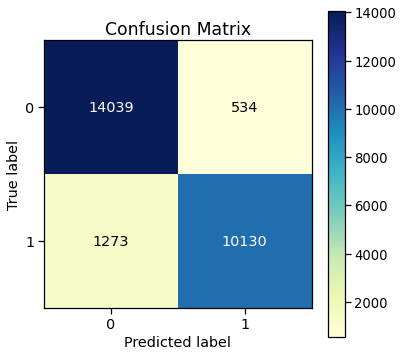

In [979]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_predknn, figsize=(6,6), cmap= 'YlGnBu');
#creating confution matric for knn

### Random forest classifier

In [968]:
from sklearn.ensemble import RandomForestClassifier
#importing library

In [969]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
#creating random forest model 

RandomForestClassifier()

In [970]:
pred_yrfc = rfc.predict(X_test)
#creating predictor variables

In [972]:
accuracyRF = accuracy_score(y_test, pred_yrfc)
print("AccuracyRF:", accuracyRF)
precisionRF = precision_score(y_test, pred_yrfc)
print("precisionRF:", precisionRF)
recallRF = recall_score(y_test, pred_yrfc)
print("recallRF:", recallRF)
f1RF = f1_score(y_test, pred_yrfc)
print("f1RF:", f1RF)
#calculating results of random forest model

AccuracyRF: 0.9629273175238682
precisionRF: 0.9706943192064923
recallRF: 0.9440498114531264
f1RF: 0.9571866803005379


In [973]:
print(f"Accuracy: {round(accuracyRF * 100, 2)}%")
print(f"Precision: {round(precisionRF * 100, 2)}%")
print(f"Recall: {round(recallRF * 100, 2)}%")
print(f"f1: {round(f1RF * 100, 2)}%")
#chaning results to percentages

Accuracy: 96.29%
Precision: 97.07%
Recall: 94.4%
f1: 95.72%


In [974]:
print(classification_report(y_test, pred_yrfc))
#printing classification report for random forest

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



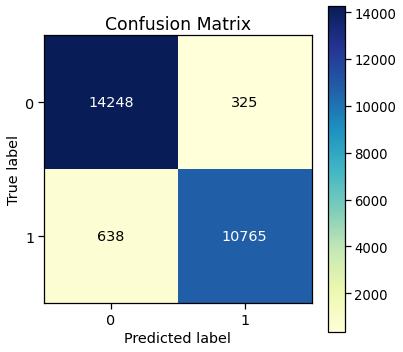

In [980]:
scikitplot.metrics.plot_confusion_matrix(y_test, pred_yrfc, figsize=(6,6), cmap= 'YlGnBu');
#creating confution matric for random forest

### XGB classifier 

In [981]:
from xgboost import XGBClassifier
#importing library

In [982]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
#defining the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [983]:
y_predxgb = XGB.predict(X_test)
#creating predictor variable

In [984]:
accuracyXGB = accuracy_score(y_test, y_predxgb)
print("AccuracyXGB:", accuracyXGB)
precisionXGB = precision_score(y_test, y_predxgb)
print("precisionXGB:", precisionXGB)
recallXGB = recall_score(y_test, y_predxgb)
print("recallXGB:", recallXGB)
f1XGB = f1_score(y_test, y_predxgb)
print("f1XGB:", f1XGB)
#calculating results of XGB model

AccuracyXGB: 0.9604250076994149
precisionXGB: 0.9619734615727135
recallXGB: 0.9472945716039639
f1XGB: 0.9545775892541535


In [985]:
print(f"Accuracy: {round(accuracyXGB * 100, 2)}%")
print(f"Precision: {round(precisionXGB * 100, 2)}%")
print(f"Recall: {round(recallXGB * 100, 2)}%")
print(f"f1: {round(f1XGB * 100, 2)}%")
#chaning results to percentages

Accuracy: 96.04%
Precision: 96.2%
Recall: 94.73%
f1: 95.46%


In [986]:
print(classification_report(y_test, y_predxgb))
#printing classification report for XGB

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14573
           1       0.96      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



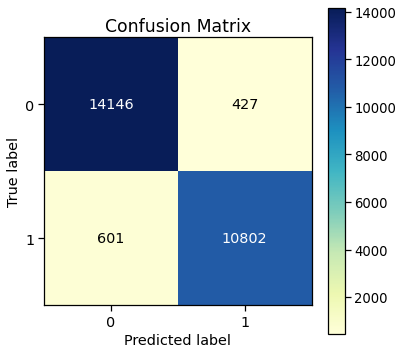

In [987]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_predxgb, figsize=(6,6), cmap= 'YlGnBu');
#creating confution matric for XGB

### Decision tree classifier

In [988]:
from sklearn.tree import DecisionTreeClassifier
#importing library

In [989]:
DTCLF =  DecisionTreeClassifier()
DTCLF.fit(X_train,y_train)
#defining the model

DecisionTreeClassifier()

In [992]:
y_pred_DTC = DTCLF.predict(X_test)
#creating the predictor variable

In [993]:
accuracyDT = accuracy_score(y_test, y_pred_DTC)
print("AccuracyDT:", accuracyDT)
precisionDT = precision_score(y_test, y_pred_DTC)
print("PrecisionDT:", precisionDT)
recallDT = recall_score(y_test, y_pred_DTC)
print("recallDT:", recallDT)
f1DT = f1_score(y_test, y_pred_DTC)
print("f1DT:", f1DT)
#calculating results of decision tree model

AccuracyDT: 0.9439482599322452
PrecisionDT: 0.9310165525608805
recallDT: 0.9421204946066825
f1DT: 0.9365356115421497


In [994]:
print(f"Accuracy: {round(accuracyDT * 100, 2)}%")
print(f"Precision: {round(precisionDT * 100, 2)}%")
print(f"Recall: {round(recallDT * 100, 2)}%")
print(f"f1: {round(f1DT * 100, 2)}%")
#chaning results to percentages

Accuracy: 94.39%
Precision: 93.1%
Recall: 94.21%
f1: 93.65%


In [995]:
print(classification_report(y_test, y_pred_DTC))
#printing classification report for decision tree

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.93      0.94      0.94     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



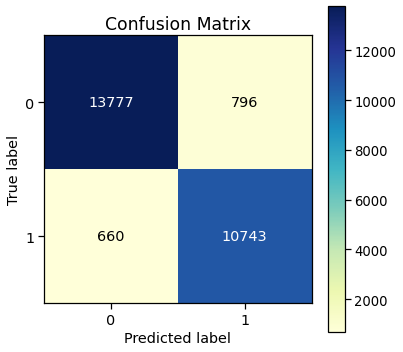

In [996]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred_DTC, figsize=(6,6), cmap= 'YlGnBu');
#creating confution matric for decision tree

### LGBM classifier

In [997]:
from lightgbm import LGBMClassifier
#importing library

In [998]:
LGBM =  LGBMClassifier()
LGBM.fit(X_train,y_train)
#defining the model

LGBMClassifier()

In [999]:
y_pred_LGBM = LGBM.predict(X_test)
#creating predictor variable

In [1000]:
accuracyLGBM = accuracy_score(y_test, y_pred_LGBM)
print("AccuracyLGBM:", accuracyLGBM)
precisionLGBM = precision_score(y_test, y_pred_LGBM)
print("precisionLGBM:", precisionLGBM)
recallLGBM = recall_score(y_test, y_pred_LGBM)
print("recallLGBM:", recallLGBM)
f1LGBM = f1_score(y_test, y_pred_LGBM)
print("f1LGBM:", f1LGBM)
#calculating results of LGBM model

AccuracyLGBM: 0.9634277794887589
precisionLGBM: 0.9693758419398294
recallLGBM: 0.9465930018416207
f1LGBM: 0.957848966190434


In [1001]:
print(f"Accuracy: {round(accuracyLGBM * 100, 2)}%")
print(f"Precision: {round(precisionLGBM * 100, 2)}%")
print(f"Recall: {round(recallLGBM * 100, 2)}%")
print(f"f1: {round(f1LGBM * 100, 2)}%")
#chaning results to percentages

Accuracy: 96.34%
Precision: 96.94%
Recall: 94.66%
f1: 95.78%


In [1002]:
print(classification_report(y_test, y_pred_LGBM))
#printing classification report for LGBM

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



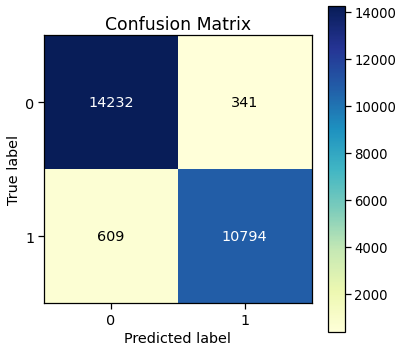

In [1003]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred_LGBM, figsize=(6,6), cmap= 'YlGnBu');
#creating confution matric for LGBM